This code provides visualizations for Visualizations such as Correlation Matrix and Time Series Plots

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [92]:
# read all parquets
weather = pd.read_parquet("../../mast30034-project-1-janggani/data/curated/weather/weather_daily.parquet")
green = pd.read_parquet("../../mast30034-project-1-janggani/data/curated/green/green_w.parquet")
yellow = pd.read_parquet("../../mast30034-project-1-janggani/data/curated/yellow/yellow_w.parquet")
yellow

,date hour,distance,duration,temp_f,wind speed
0,2019-02-11 0,4.53,16.04,33.80,3.36
1,2019-02-11 1,4.72,16.39,33.98,5.34
2,2019-02-11 2,4.33,16.61,31.64,0.00
3,2019-02-11 3,4.31,15.16,31.82,6.09
4,2019-02-11 4,5.15,20.08,30.56,7.77
...,...,...,...,...,...
4338,2019-05-03 19,2.57,16.75,52.88,2.36
4339,2019-05-03 20,2.89,16.61,52.70,4.91
4340,2019-05-03 21,3.03,18.04,52.70,3.85
4341,2019-05-03 22,3.13,17.00,52.52,2.11


In [93]:
# rename columns for readability
yellow.columns = ["Date and hour", "Trip distance", "Trip duration", "Temperature", "Wind speed"]
green.columns = ["Date and hour", "Trip distance", "Trip duration", "Temperature", "Wind speed"]

# switch to numeric
yellow._convert(numeric = True)
green._convert(numeric = True)

,Date and hour,Trip distance,Trip duration,Temperature,Wind speed
0,2019-02-11 0,2.97,10.23,33.80,3.36
1,2019-02-11 1,2.39,9.45,33.98,5.34
2,2019-02-11 2,3.01,50.29,31.64,0.00
3,2019-02-11 3,3.95,41.23,31.82,6.09
4,2019-02-11 4,4.74,12.92,30.56,7.77
...,...,...,...,...,...
4338,2019-05-03 19,2.46,15.92,52.88,2.36
4339,2019-05-03 20,2.49,17.65,52.70,4.91
4340,2019-05-03 21,2.67,20.97,52.70,3.85
4341,2019-05-03 22,2.87,18.04,52.52,2.11


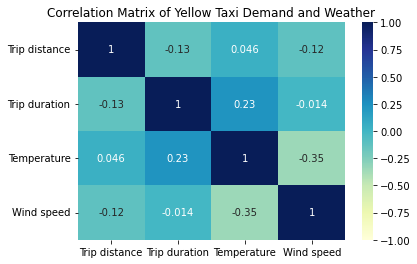

In [94]:
# correlation matrix of yellow taxi and weather
variables = ["Trip distance","Trip duration","Temperature", "Wind speed"]

cm_y = sns.heatmap(yellow[variables].corr(), cmap = "YlGnBu", annot=True, vmin=-1, vmax=1)
cm_y.set_title('Correlation Matrix of Yellow Taxi Demand and Weather')

# save as png
cm_y.figure.savefig('../../mast30034-project-1-janggani/plots/yellow weather.png')

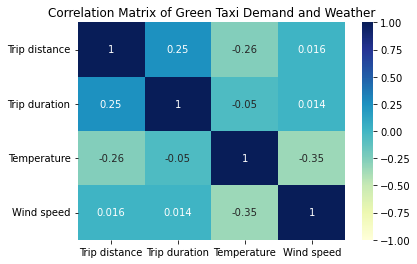

In [95]:
# correlation matrix of green taxi and weather
cm_g = sns.heatmap(green[variables].corr(), cmap = "YlGnBu", annot=True, vmin=-1, vmax=1)
cm_g.set_title('Correlation Matrix of Green Taxi Demand and Weather')

# save as png
cm_g.figure.savefig('../../mast30034-project-1-janggani/plots/green weather.png')                   

In [125]:
# get average trip distance per hour on specific days and place them in a histogram
weather_d = pd.read_parquet("../../mast30034-project-1-janggani/data/curated/weather/weather_daily.parquet")

In [146]:
# find the coldest day
cold = weather_d[weather_d["temp"] == weather_d["temp"].min()] # Jan 21 2019

# find the hottest day
hot = weather_d[weather_d["temp"] == weather_d["temp"].max()] # June 28 2019

# find the median day
median = weather_d[weather_d["temp"] == weather_d["temp"].median()] # Apr 29 2019

# windiest day
wind = weather_d[weather_d["wind speed"] == weather_d["wind speed"].max()] # Feb 25 2019

In [137]:
# yellow taxi graphs
cold_y = yellow_c.loc[yellow_c['date'] == "2019-01-21"]
coldest_y = cold_y.groupby('hour').mean()
coldest_y = coldest_y.reset_index() 

hot_y = yellow_c.loc[yellow_c['date'] == "2019-06-28"]
hottest_y = hot_y.groupby('hour').mean()
hottest_y = hottest_y.reset_index() 

med_y = yellow_c.loc[yellow_c['date'] == "2019-04-29"]
median_y = med_y.groupby('hour').mean()
median_y = median_y.reset_index() 

wind_y = yellow_c.loc[yellow_c['date'] == "2019-02-25"]
windiest_y = wind_y.groupby('hour').mean()
windiest_y = windiest_y.reset_index() 

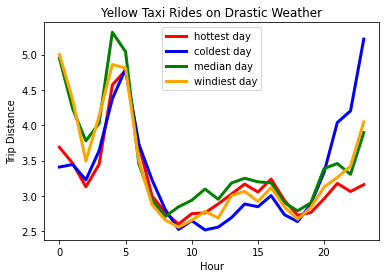

In [148]:
# we're not using trip duration as traffic may impact (especially during peak hours)
# time series plot
yellow_tsp = plt.plot(hottest_y['hour'], hottest_y['trip_distance'], color = "red", label='hottest day', linewidth=3)
yellow_tsp = plt.plot(coldest_y['hour'], coldest_y['trip_distance'], color = "blue", label='coldest day', linewidth=3)
yellow_tsp = plt.plot(median_y['hour'], median_y['trip_distance'], color = "green", label='median day', linewidth=3)
yellow_tsp = plt.plot(windiest_y['hour'], windiest_y['trip_distance'], color = "orange", label ='windiest day', linewidth=3)
yellow_tsp = plt.title('Yellow Taxi Rides on Drastic Weather')
yellow_tsp = plt.xlabel('Hour')
yellow_tsp = plt.ylabel('Trip Distance')
yellow_tsp = plt.legend()
yellow_tsp.figure.savefig('../../mast30034-project-1-janggani/plots/yellow time series.png')

In [144]:
# green taxi graphs
cold_g = green_c.loc[green_c['date'] == "2019-01-21"]
coldest_g = cold_g.groupby('hour').mean()
coldest_g = coldest_g.reset_index() 

hot_g = green_c.loc[green_c['date'] == "2019-06-28"]
hottest_g = hot_g.groupby('hour').mean()
hottest_g = hottest_g.reset_index() 

med_g = green_c.loc[green_c['date'] == "2019-04-29"]
median_g = med_g.groupby('hour').mean()
median_g = median_g.reset_index() 

wind_g = green_c.loc[green_c['date'] == "2019-02-25"]
windiest_g = wind_g.groupby('hour').mean()
windiest_g = windiest_g.reset_index() 

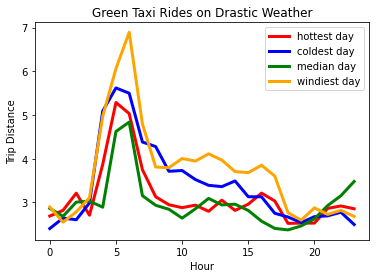

In [147]:
green_tsp = plt.plot(hottest_g['hour'], hottest_g['trip_distance'], color = "red", label='hottest day', linewidth=3)
green_tsp = plt.plot(coldest_g['hour'], coldest_g['trip_distance'], color = "blue", label='coldest day', linewidth=3)
green_tsp = plt.plot(median_g['hour'], median_g['trip_distance'], color = "green", label='median day', linewidth=3)
green_tsp = plt.plot(windiest_g['hour'], windiest_g['trip_distance'], color = "orange", label ='windiest day', linewidth=3)
green_tsp = plt.title('Green Taxi Rides on Drastic Weather')
green_tsp = plt.xlabel('Hour')
green_tsp = plt.ylabel('Trip Distance')
green_tsp = plt.legend()
green_tsp.figure.savefig('../../mast30034-project-1-janggani/plots/green time series.png')